# BA820: Unsupervised Machine Learning
# Team Project
**Team B3 (Alphabetically):**
* Hanyu Chen
* Yipeng (Caroline) Guo
* Luke Hong
* Ting-Ann (Ann) Lu
* Yuyan (Mona) Ma

***

**Dataset:** 
    OkCupid: Find A Great Match Using Dating App
    
 (*Data source from OkCupid authorization: https://github.com/rudeboybert/JSE_OkCupid*)

  The dataset is from OkCupid, a mobile dating app. It sets itself apart from other dating apps by making use of a pre computed compatibility score, calculated by optional questions the users may choose to answer. 


**Background:**
    The rationale behind this project is that each person has their own specific status and preference when choosing their date. For example, either user can be vegetarian hence wants to date a vegetarian as well, or one can be gay or lesbian who craves a same-sexual couple. Sometimes the pairing & recommendation system will not do this kind of specific filter for people, which will lead to a higher possibility of misunderstanding and waste of time.


**Objective:**
    Our goal is to clustering users into different basic pools based on their basic information, analyzing their hidden emotion and preference based on their descriptive essays and finally finding perfect match based on the recommendation system. We are supposed to inplacement unsupervised machine learning tools like H-Clustering, K-Means Clustering, PCA and multiple text analysis.

# Summary of the Dataset

To explore the users characteristics that exists in this dataset, we have the following multiple variables.

59,946 entries with 31 arrtributes (here we will give a simplified description)

- **Basic information:** Age, Relationship status, Height, Sex, Sex orientation etc.
- **Detailed information:** Education, Ethnicity and Language
- **Living habit:** Diet, Drink or not, Drugs or not, smokes or not
- **Financial Status:** Income and Job
- **Description:** One sentence about yourself, one about your hobby, what can bring a smile on your face, about your future etc.
- **Personal preference:** What kind of person are you looking for (text description)


# 1. Data Cleaning and Processing

## 1.1 Create merged data (essays)

In [ ]:
import pandas as pd 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BA820/Copy of okcupid_profiles.csv')
# df = pd.read_csv ("okcupid_profiles.csv")
df.head(3)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++","i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."


In [ ]:
df.shape

(59946, 31)

In [ ]:
df.drop(columns = ['age','status', 'sex','orientation', 'body_type', 'diet','drinks','drugs','education','ethnicity', 'height', 'income', 'job', 'last_online', 'location', 'offspring', 'pets', 'religion', 'sign', 'smokes', 'speaks'], inplace = True)

In [ ]:
df.head(3)

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."


In [ ]:
df.shape

(59946, 10)

In [ ]:
# ID them for our convinience of join
df['id'] = range(len(df))
df.set_index = df['id']

In [ ]:
# inplace NaN as vacant string for our convinience to combine

df.fillna('',inplace=True)

In [ ]:
df.head(3)

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,id
0,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,0
1,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,,,i am very open and will share just about anyth...,,1
2,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",2


In [ ]:
# Combine them together

df['Full_essay'] = df['essay0'] + df['essay1'] + df['essay2'] + df['essay3'] + df['essay4'] + df['essay5'] + df['essay6'] + df['essay7'] + df['essay8'] + df['essay9']

In [ ]:
df.head(5)

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,id,Full_essay
0,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,0,about me: i would love to think that i was so...
1,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,,,i am very open and will share just about anyth...,,1,i am a chef: this is what that means. 1. i am ...
2,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",2,"i'm not ashamed of much, but writing public te..."
3,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",,cats and german philosophy,,,you feel so inclined.,3,i work in a library and go to school. . .readi...
4,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",,,,,,4,hey how's it going? currently vague on the pro...


In [ ]:
df.drop(columns = ['essay0','essay1', 'essay2','essay3', 'essay4', 'essay5','essay6','essay7','essay8','essay9'], inplace = True)
df.sample(3)

,id,Full_essay
22419,22419,still figuring out what to put here... for now...
58337,58337,im from new york city living in san francisco....
56155,56155,"loving, playful, imaginative, creative. hardwo..."


In [ ]:
# import the cleaned data

df_new = pd.read_csv('https://raw.githubusercontent.com/CarolineGuothesweetie/OkCupid/main/Cleaned_OkCupid.csv')
# df_new = pd.read_csv("cleaned.csv")
df_new.head(3)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,id
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,0
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",1
2,31,single,f,straight,average,mostly anything,socially,never,graduated from college/university,white,65.0,-1,artistic / musical / writer,2012-06-29-12-30,"san francisco, california","doesn't have kids, but wants them",likes dogs and likes cats,christianity,sagittarius,no,"english, spanish (okay)",7


In [ ]:
# Join the cleaned by id

total = df.merge(df_new, on = 'id', how = 'right')
total.head(5)

,id,Full_essay,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
0,0,about me: i would love to think that i was so...,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english
1,1,i am a chef: this is what that means. 1. i am ...,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (..."
2,7,"writing. meeting new people, spending time wit...",31,single,f,straight,average,mostly anything,socially,never,graduated from college/university,white,65.0,-1,artistic / musical / writer,2012-06-29-12-30,"san francisco, california","doesn't have kids, but wants them",likes dogs and likes cats,christianity,sagittarius,no,"english, spanish (okay)"
3,14,i have an awesome career working as a senior m...,29,single,f,straight,thin,mostly anything,socially,never,working on college/university,"hispanic / latin, white",62.0,50000,other,2012-06-29-08-55,"san leandro, california","doesn't have kids, but wants them",likes dogs and has cats,catholicism,taurus,no,english
4,19,i relocated to san francisco half a year ago. ...,33,single,m,straight,athletic,mostly anything,socially,never,graduated from masters program,white,72.0,-1,science / tech / engineering,2012-06-27-21-41,"san francisco, california",doesn't have kids,likes dogs and likes cats,catholicism but not too serious about it,pisces and it&rsquo;s fun to think about,no,english (fluently)


In [ ]:
total.shape

(9055, 23)

In [ ]:
# total.to_csv('merged.csv', index=False)

In [ ]:
feature = total.drop(columns = ['age','status', 'sex','orientation','body_type', 'diet', 'drinks', 'drugs','education','height','income', 'offspring', 'pets', 'smokes'], inplace = False)
feature.head(3)

,id,Full_essay,ethnicity,job,last_online,location,religion,sign,speaks
0,0,about me: i would love to think that i was so...,"asian, white",transportation,2012-06-28-20-30,"south san francisco, california",agnosticism and very serious about it,gemini,english
1,1,i am a chef: this is what that means. 1. i am ...,white,hospitality / travel,2012-06-29-21-41,"oakland, california",agnosticism but not too serious about it,cancer,"english (fluently), spanish (poorly), french (..."
2,7,"writing. meeting new people, spending time wit...",white,artistic / musical / writer,2012-06-29-12-30,"san francisco, california",christianity,sagittarius,"english, spanish (okay)"


In [ ]:
feature.drop(columns=['Full_essay', 'job', 'last_online', 'location', 'speaks'], inplace=True)
feature.sample(3)

,id,ethnicity,religion,sign
4482,29291,white,agnosticism but not too serious about it,virgo but it doesn&rsquo;t matter
8000,53184,"hispanic / latin, other",other,libra and it&rsquo;s fun to think about
8934,59078,"middle eastern, white",catholicism but not too serious about it,cancer and it&rsquo;s fun to think about


In [ ]:
feature.to_csv('feature.csv', index=False)

## 1.2 Segement categorical data into numerical

In [ ]:
# check for unique input of our dataset
(total['drinks'].unique())
find_replace_drinks = {"drinks":{"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5 }}
total.replace(find_replace_drinks, inplace=True)
total.head(3)
# give a scale <- not at all - 0; rarely - 1; socially - 2; often - 3; very often - 4; desperately - 5.

,id,Full_essay,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
0,0,about me: i would love to think that i was so...,22,single,m,straight,a little extra,strictly anything,2,never,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english
1,1,i am a chef: this is what that means. 1. i am ...,35,single,m,straight,average,mostly other,3,sometimes,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (..."
2,7,"writing. meeting new people, spending time wit...",31,single,f,straight,average,mostly anything,2,never,graduated from college/university,white,65.0,-1,artistic / musical / writer,2012-06-29-12-30,"san francisco, california","doesn't have kids, but wants them",likes dogs and likes cats,christianity,sagittarius,no,"english, spanish (okay)"


In [ ]:
(total['drugs'].unique()) 
find_replace_drugs = {"drugs" : {"never": 0, "sometimes": 1, "often": 2}}
total.replace(find_replace_drugs, inplace=True)
# give a scale <- 0, 1, 2

In [ ]:
total.head(2)

,id,Full_essay,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
0,0,about me: i would love to think that i was so...,22,single,m,straight,a little extra,strictly anything,2,0,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english
1,1,i am a chef: this is what that means. 1. i am ...,35,single,m,straight,average,mostly other,3,1,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (..."


In [ ]:
(total['smokes'].unique())

# give a scale <- no - 0; tring to quit - 1; when drinking - 2; sometimes - 3; yes - 4

find_replace_smokes = {"smokes" : {"no": 0, "when drinking": 1, "trying to quit": 2, "sometimes": 3, "yes": 4}}
total.replace(find_replace_smokes, inplace=True)
total.head(2)

,id,Full_essay,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
0,0,about me: i would love to think that i was so...,22,single,m,straight,a little extra,strictly anything,2,0,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,3,english
1,1,i am a chef: this is what that means. 1. i am ...,35,single,m,straight,average,mostly other,3,1,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,0,"english (fluently), spanish (poorly), french (..."


In [ ]:
(total['education'].unique())
h_s = 'igh school'
t_g = 'ar college'
c_u = 'university'
m_s = 'rs program'
p_d = '.d program'
l_s = 'law school'
md_s = 'med school'
s_c = 'space camp'
index = 0
for item in total['education']:
  if item[-10:] == c_u:
    total['education'][index] = "undergrades"
  if item[-10:] == t_g:
    total['education'][index] = "undergrades"
  if item[-10:] == h_s:
    total['education'][index] = "high school"
  if item[-10:] == m_s:
    total['education'][index] = "masters"
  if item[-10:] == p_d:
    total['education'][index] = "phd"
  if item[-10:] == l_s:
    total['education'][index] = "law school"
  if item[-10:] == md_s:
    total['education'][index] = "med school"
  if item[-10:] == s_c:
    total['education'][index] = "space camp"
  index +=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A va

In [ ]:
total.head(2)

,id,Full_essay,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
0,0,about me: i would love to think that i was so...,22,single,m,straight,a little extra,strictly anything,2,0,undergrades,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,3,english
1,1,i am a chef: this is what that means. 1. i am ...,35,single,m,straight,average,mostly other,3,1,space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,0,"english (fluently), spanish (poorly), french (..."


In [ ]:
# give a scale here

find_replace_edu = {"education" : {"high school": 0, "undergrades": 1, "masters": 2, "phd": 3, "law school": 4, "med school" : 5, "space camp" : 6}}
total.replace(find_replace_edu, inplace=True)
total.head(2)

,id,Full_essay,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
0,0,about me: i would love to think that i was so...,22,single,m,straight,a little extra,strictly anything,2,0,1,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,3,english
1,1,i am a chef: this is what that means. 1. i am ...,35,single,m,straight,average,mostly other,3,1,6,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,0,"english (fluently), spanish (poorly), french (..."


In [ ]:
(total['status'].unique())

array(['single', 'available', 'seeing someone', 'married'], dtype=object)

In [ ]:
# give a scale here

find_replace_status = {"status" : {"single": 0, "available": 1, "seeing someone": 2, "married": 3}}
total.replace(find_replace_status, inplace=True)
total.head(2)

,id,Full_essay,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
0,0,about me: i would love to think that i was so...,22,0,m,straight,a little extra,strictly anything,2,0,1,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,3,english
1,1,i am a chef: this is what that means. 1. i am ...,35,0,m,straight,average,mostly other,3,1,6,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,0,"english (fluently), spanish (poorly), french (..."


In [ ]:
(total['sex'].unique())

array(['m', 'f'], dtype=object)

In [ ]:
# give a scale here

find_replace_sex = {"sex" : {"m": 0, "f": 1}}
total.replace(find_replace_sex, inplace=True)
total.head(2)

,id,Full_essay,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
0,0,about me: i would love to think that i was so...,22,0,0,straight,a little extra,strictly anything,2,0,1,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,3,english
1,1,i am a chef: this is what that means. 1. i am ...,35,0,0,straight,average,mostly other,3,1,6,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,0,"english (fluently), spanish (poorly), french (..."


In [ ]:
(total['orientation'].unique())

array(['straight', 'bisexual', 'gay'], dtype=object)

In [ ]:
# give a scale here

find_replace_ori = {"orientation" : {"straight": 0, "gay" : 1, "bisexual": 2}}
total.replace(find_replace_ori, inplace=True)
total.head(2)

,id,Full_essay,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
0,0,about me: i would love to think that i was so...,22,0,0,0,a little extra,strictly anything,2,0,1,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,3,english
1,1,i am a chef: this is what that means. 1. i am ...,35,0,0,0,average,mostly other,3,1,6,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,0,"english (fluently), spanish (poorly), french (..."


In [ ]:
(total['income'].unique()) # <- rename '-1' as '0'
total['income'].replace(-1, 0, inplace = True)

In [ ]:
total.sample(5)

,id,Full_essay,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
3761,24971,i travel the world and the 7 seasfix thing tha...,30,0,0,0,average,mostly anything,2,0,3,"middle eastern, native american",71.0,0,retired,2012-06-26-21-01,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,other and laughing about it,pisces and it&rsquo;s fun to think about,0,"english (fluently), greek (poorly), c++ (okay)..."
3075,20448,french boy trying to live the american dream i...,22,0,0,0,average,mostly anything,3,0,2,white,71.0,30000,science / tech / engineering,2012-05-26-21-23,"san francisco, california","doesn't have kids, and doesn't want any",dislikes dogs and likes cats,other,aries and it&rsquo;s fun to think about,0,"english (fluently), french (fluently), german ..."
9035,59775,working in a creative industry (brand marketin...,47,0,0,0,athletic,mostly anything,2,0,1,white,72.0,0,sales / marketing / biz dev,2012-06-29-22-37,"san carlos, california","has a kid, but doesn't want more",likes dogs,other,scorpio and it&rsquo;s fun to think about,0,english
2284,15128,i'm an ice cream eating space cadet who spends...,22,2,1,0,fit,anything,3,1,1,white,69.0,0,artistic / musical / writer,2011-08-02-09-19,"novato, california",doesn't want kids,dislikes dogs and likes cats,other and somewhat serious about it,leo,2,english
3417,22723,"i am a fun loving, dog loving, sports loving g...",33,0,1,0,fit,anything,2,0,1,white,67.0,20000,education / academia,2012-06-27-13-42,"mountain view, california","doesn't have kids, but wants them",has dogs,catholicism and somewhat serious about it,cancer and it&rsquo;s fun to think about,0,english (fluently)


In [ ]:
(total['job'].unique())

array(['transportation', 'hospitality / travel',
       'artistic / musical / writer', 'other',
       'science / tech / engineering', 'executive / management',
       'education / academia', 'construction / craftsmanship',
       'unemployed', 'medicine / health',
       'computer / hardware / software', 'sales / marketing / biz dev',
       'entertainment / media', 'banking / financial / real estate',
       'student', 'clerical / administrative', 'retired', 'military',
       'law / legal services', 'political / government', 'rather not say'],
      dtype=object)

In [ ]:
total.drop(columns='job', inplace = True)

In [ ]:
total.drop(columns = 'last_online', inplace = True)

In [ ]:
total.drop(columns = 'speaks', inplace = True)

In [ ]:
(total['offspring'].unique())

# No or dont want - 0
# No and want - 1
# Yes or want more - 2
# Yes and dont want more - 3

array(["doesn't have kids, but might want them",
       "doesn't have kids, but wants them", "doesn't have kids",
       "doesn't want kids", 'has kids', 'has a kid',
       "doesn't have kids, and doesn't want any",
       'has kids, and might want more', "has kids, but doesn't want more",
       'has a kid, and might want more',
       "has a kid, but doesn't want more", 'has a kid, and wants more',
       'might want kids', 'wants kids', 'has kids, and wants more'],
      dtype=object)

In [ ]:
total.sample(2)

,id,Full_essay,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,location,offspring,pets,religion,sign,smokes
5940,39301,i'm as american as you can get without actuall...,34,0,0,0,athletic,mostly anything,2,0,1,asian,68.0,0,"san francisco, california","doesn't have kids, but might want them",likes dogs,other and somewhat serious about it,aquarius but it doesn&rsquo;t matter,0
6791,44760,i'm an aged-21 fella who likes art and also ha...,21,0,0,0,average,mostly anything,2,2,1,"middle eastern, white",66.0,0,"emeryville, california",doesn't have kids,likes dogs and likes cats,atheism and laughing about it,aries but it doesn&rsquo;t matter,0


In [ ]:
total.drop(columns='religion', inplace=True)
total.drop(columns='sign', inplace=True)

In [ ]:
find_replace_off = {"offspring" :                     
                    {"doesn't have kids, but might want them": "1",
                     "doesn't have kids, but wants them": "1",
                     "doesn't have kids": "0",
                     "doesn't want kids": "0",
                     "has kids" : "2",
                     "has a kid" : "2",
                     "doesn't have kids, and doesn't want any" : "0",
                     "has kids, and might want more" : "2",
                     "has kids, but doesn't want more" : "3",
                     "has a kid, and might want more" : "2",
                     "has a kid, but doesn't want more" : "3",
                     "has a kid, and wants more" : "2",
                     "might want kids" : "1",
                     "wants kids" : "1",
                     "has kids, and wants more" : "2"
                    }
                  }

total.replace(find_replace_off, inplace=True)

In [ ]:
total.sample(3)

,id,Full_essay,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,location,offspring,pets,smokes
4233,27793,i love adventure and traveling the world. my p...,50,0,1,0,curvy,anything,2,0,1,white,66.0,0,"san francisco, california",0,likes dogs and dislikes cats,0
3833,25435,music is a very important part of my life. i l...,54,0,0,0,fit,mostly vegetarian,3,1,1,white,69.0,0,"san francisco, california",2,has dogs,0
1396,9007,at first you won't realize your reading my dia...,23,1,0,0,fit,mostly anything,1,1,1,"asian, native american, white",66.0,0,"san francisco, california",0,likes dogs and likes cats,3


In [ ]:
(total['body_type'].unique())

array(['a little extra', 'average', 'thin', 'athletic', 'fit', 'curvy',
       'full figured', 'skinny', 'normal', 'overweight', 'used up',
       'jacked', 'rather not say'], dtype=object)

In [ ]:
find_replace_body = {"body_type" :                     
                    {'skinny': '0',
                     'thin': '0',
                     'average': '1',
                     'normal': '1',
                     'a little extra': '2',
                     'curvy': '2',
                     'full figured': '2',
                     'overweight': '3',
                     'athletic': '4',
                     'fit': '4',
                     'used up': '5',
                     'jacked': '5',
                     'rather not say': '5'
                    }
                  }

total.replace(find_replace_body, inplace=True)

In [ ]:
total.sample(3)

,id,Full_essay,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,location,offspring,pets,smokes
6785,44695,"i'm open to fun, friends, and dating. i could ...",34,0,0,1,1,mostly anything,2,0,1,asian,71.0,0,"san francisco, california",0,likes dogs and likes cats,0
5023,32844,10 things you should know about me: 1. even th...,47,0,1,0,4,mostly vegetarian,2,0,1,asian,64.0,0,"berkeley, california",0,has dogs,0
2100,13856,i am a nonsense type of girl when it all comes...,35,0,1,0,1,strictly other,2,0,1,white,68.0,0,"san francisco, california",1,likes dogs and likes cats,0


In [ ]:
(total['diet'].unique())

array(['strictly anything', 'mostly other', 'mostly anything', 'anything',
       'mostly halal', 'other', 'mostly vegetarian', 'vegan',
       'strictly vegan', 'vegetarian', 'mostly kosher', 'mostly vegan',
       'strictly vegetarian', 'strictly other', 'strictly kosher',
       'strictly halal', 'kosher'], dtype=object)

In [ ]:
find_replace_diet = {"diet" :                     
                    {'strictly anything': '0',
                     'mostly anything': '0',
                     'anything': '0',
                     'mostly vegetarian': '1',
                     'strictly vegetarian': '1',
                     'vegan': '1',
                     'strictly vegan': '1',
                     'vegetarian': '1',
                     'mostly vegan': '1',
                     'mostly halal': '2',
                     'strictly halal': '2',
                     'mostly kosher': '3',
                     'strictly kosher': '3',
                     'kosher': '3',
                     'mostly other': '4',
                     'other': '4',
                     'strictly other': '4'
                    }
                  }

total.replace(find_replace_diet, inplace=True)
total.sample(3)

,id,Full_essay,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,location,offspring,pets,smokes
2734,18274,please do not contact me if you are in a relat...,47,0,1,0,1,0,1,0,1,white,64.0,0,"redwood city, california",2,has dogs and likes cats,0
8496,56286,"it's always awkward providing a self summary, ...",23,0,0,0,4,0,3,1,1,"middle eastern, white",77.0,0,"san francisco, california",0,likes dogs and has cats,4
6400,42147,i am a very caring person. i love to help othe...,23,0,1,0,2,0,2,0,1,"black, other",67.0,0,"san francisco, california",2,likes dogs,0


In [ ]:
(total['pets'].unique())

array(['likes dogs and likes cats', 'likes dogs and has cats',
       'likes dogs and dislikes cats', 'has cats', 'likes dogs',
       'dislikes dogs and has cats', 'has dogs and dislikes cats',
       'has dogs and has cats', 'has dogs', 'has dogs and likes cats',
       'dislikes cats', 'dislikes dogs and dislikes cats', 'likes cats',
       'dislikes dogs and likes cats', 'dislikes dogs'], dtype=object)

In [ ]:
# 0-both like; 1-dog lover; 2-cat lover; 3-cat hater; 4-dog hater; 5-both hater
find_replace_pets = {"pets" :                     
                    {'likes dogs and likes cats': '0',
                     'likes dogs and has cats': '0',
                     'has dogs and has cats': '0',
                     'has dogs and likes cats': '0',
                     'likes dogs and dislikes cats': '1',
                     'likes dogs': '1',
                     'has dogs and dislikes cats': '1',
                     'has dogs': '1',
                     'has cats': '2',
                     'dislikes dogs and has cats': '2',
                     'likes cats': '2',
                     'dislikes dogs and likes cats': '2',
                     'dislikes cats': '3',
                     'dislikes dogs': '4',
                     'dislikes dogs and dislikes cats': '5'
                    }
                  }

total.replace(find_replace_pets, inplace=True)
total.sample(3)

,id,Full_essay,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,location,offspring,pets,smokes
6789,44738,i am a very down to earth person. despite the ...,23,0,0,0,4,0,2,0,1,white,69.0,80000,"benicia, california",1,0,0
7185,47717,"true to profile name, i like the outdoors (gre...",40,0,0,0,1,0,2,0,4,white,73.0,0,"albany, california",2,0,0
2566,17114,i'm kind of a gigantic homo. i currently iden...,25,0,0,2,5,1,1,0,2,white,69.0,1000000,"san francisco, california",0,0,0


In [ ]:
#(total['ethnicity'].unique())
total.drop(columns='ethnicity', inplace=True)

In [ ]:
total.sample(3)

,id,Full_essay,age,status,sex,orientation,body_type,diet,drinks,drugs,education,height,income,location,offspring,pets,smokes
8861,58648,"stuart, 23. student athlete, football(soccer)e...",23,0,0,0,4,0,3,0,2,72.0,0,"san francisco, california",0,0,0
780,5026,i am a sweet loving caring handsome guy like p...,27,0,0,0,1,0,2,0,1,70.0,30000,"san francisco, california",0,0,0
4486,29306,i'm a divorced businessman living in the penin...,46,0,0,0,2,0,1,0,1,76.0,0,"san francisco, california",2,1,1


In [ ]:
(total['pets'].unique())

array(['0', '1', '2', '3', '5', '4'], dtype=object)

In [ ]:
total.shape

(9055, 17)

In [ ]:
total.dtypes

id               int64
Full_essay      object
age              int64
status           int64
sex              int64
orientation      int64
body_type       object
diet            object
drinks           int64
drugs            int64
education        int64
height         float64
income           int64
location        object
offspring       object
pets            object
smokes           int64
dtype: object

In [ ]:
total.to_csv('OkCupid.csv', index=False)

## 1.3 Save numercial subset & text subset seperately

### 1.3.1 Numerical (9905,15)

In [ ]:
numerical = total.drop(columns = ['Full_essay','location'], inplace = False)
numerical.head(3)

,id,age,status,sex,orientation,body_type,diet,drinks,drugs,education,height,income,offspring,pets,smokes
0,0,22,0,0,0,2,0,2,0,1,75.0,0,1,0,3
1,1,35,0,0,0,1,4,3,1,6,70.0,80000,1,0,0
2,7,31,0,1,0,1,0,2,0,1,65.0,0,1,0,0


In [ ]:
numerical.shape

(9055, 15)

In [ ]:
numerical.to_csv('numecial.csv', index=False)


### 1.3.2 Text (9055,3)

In [ ]:
text = total.drop(columns = ['age','status', 'sex','orientation','body_type', 'diet', 'drinks', 'drugs','education','height','income', 'offspring', 'pets', 'smokes'], inplace = False)
text.head(3)

,id,Full_essay,location
0,0,about me: i would love to think that i was so...,"south san francisco, california"
1,1,i am a chef: this is what that means. 1. i am ...,"oakland, california"
2,7,"writing. meeting new people, spending time wit...","san francisco, california"


In [ ]:
text.shape

(9055, 3)

In [ ]:
text.to_csv('text.csv', index=False)

In [ ]:
# (total['pets'].unique()) # <- apply text analysis here

In [ ]:
# (total['ethnicity'].unique()) 
# here we do text analysis like CV()

In [ ]:
# (total['location'].unique()) # leave it this way

In [ ]:
# (total['religion'].unique())

# apply sentimental or cv?

In [ ]:
# (total['sign'].unique())

# apply sentimental or cv?

# 2. EDA

In [ ]:
# Usual
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
ok_num = pd.read_csv('https://raw.githubusercontent.com/CarolineGuothesweetie/OkCupid/main/numecial.csv')

In [ ]:
ok_num.head()

,id,age,status,sex,orientation,body_type,diet,drinks,drugs,education,height,income,offspring,pets,smokes
0,0,22,0,0,0,2,0,2,0,1,75.0,0,1,0,3
1,1,35,0,0,0,1,4,3,1,6,70.0,80000,1,0,0
2,7,31,0,1,0,1,0,2,0,1,65.0,0,1,0,0
3,14,29,0,1,0,0,0,2,0,1,62.0,50000,1,0,0
4,19,33,0,0,0,4,0,2,0,2,72.0,0,0,0,0


In [ ]:
ok_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           9055 non-null   int64  
 1   age          9055 non-null   int64  
 2   status       9055 non-null   int64  
 3   sex          9055 non-null   int64  
 4   orientation  9055 non-null   int64  
 5   body_type    9055 non-null   int64  
 6   diet         9055 non-null   int64  
 7   drinks       9055 non-null   int64  
 8   drugs        9055 non-null   int64  
 9   education    9055 non-null   int64  
 10  height       9055 non-null   float64
 11  income       9055 non-null   int64  
 12  offspring    9055 non-null   int64  
 13  pets         9055 non-null   int64  
 14  smokes       9055 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 1.0 MB


In [ ]:
raw = pd.read_csv('https://raw.githubusercontent.com/CarolineGuothesweetie/OkCupid/main/OkCupid.csv')

In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           9055 non-null   int64  
 1   Full_essay   8804 non-null   object 
 2   age          9055 non-null   int64  
 3   status       9055 non-null   int64  
 4   sex          9055 non-null   int64  
 5   orientation  9055 non-null   int64  
 6   body_type    9055 non-null   int64  
 7   diet         9055 non-null   int64  
 8   drinks       9055 non-null   int64  
 9   drugs        9055 non-null   int64  
 10  education    9055 non-null   int64  
 11  height       9055 non-null   float64
 12  income       9055 non-null   int64  
 13  location     9055 non-null   object 
 14  offspring    9055 non-null   int64  
 15  pets         9055 non-null   int64  
 16  smokes       9055 non-null   int64  
dtypes: float64(1), int64(14), object(2)
memory usage: 1.2+ MB


In [ ]:
raw.head(3)

,id,Full_essay,age,status,sex,orientation,body_type,diet,drinks,drugs,education,height,income,location,offspring,pets,smokes
0,0,about me: i would love to think that i was so...,22,0,0,0,2,0,2,0,1,75.0,0,"south san francisco, california",1,0,3
1,1,i am a chef: this is what that means. 1. i am ...,35,0,0,0,1,4,3,1,6,70.0,80000,"oakland, california",1,0,0
2,7,"writing. meeting new people, spending time wit...",31,0,1,0,1,0,2,0,1,65.0,0,"san francisco, california",1,0,0


In [ ]:
raw['sex'].describe()

count    9055.000000
mean        0.458421
std         0.498296
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64

**Orientation Distribution**

Text(0, 0.5, 'counts')

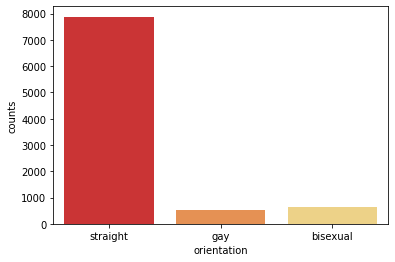

In [ ]:
raw['orientation'].unique()
orien_dis = sns.barplot(x = raw['orientation'].unique(), y = raw['orientation'].value_counts(), palette="YlOrRd_r")
orien_dis = orien_dis.set_xticklabels(['straight', 'gay', 'bisexual'])
plt.xlabel('orientation')
plt.ylabel('counts')

**Income Distribution**

Text(0, 0.5, 'counts')

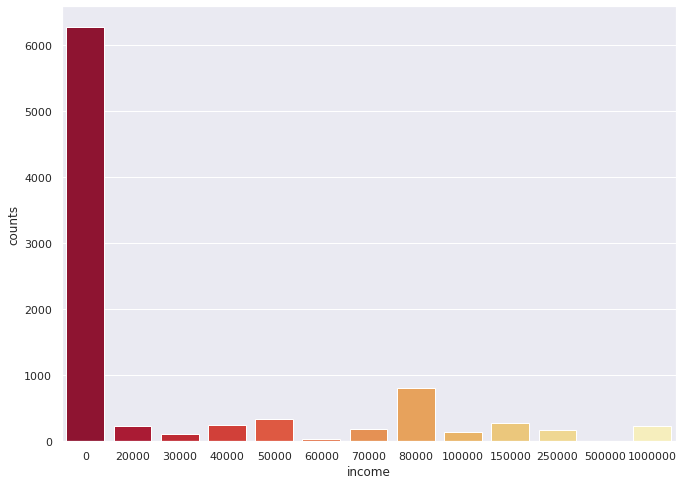

In [ ]:
raw['income'].unique()
sns.set(rc={'figure.figsize':(11,8)})
orien_dis = sns.barplot(x = raw['income'].unique(), y = raw['income'].value_counts(), palette="YlOrRd_r")
# orien_dis = orien_dis.set_xticklabels(['0', '', 'bisexual'])
plt.xlabel('income')
plt.ylabel('counts')

**Age Distribution**

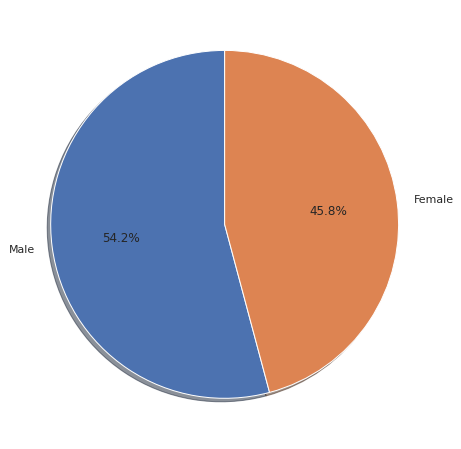

In [ ]:
find_replace_sex = {"sex" : {0: "Male", 1:"Female"}}
raw.replace(find_replace_sex, inplace=True)
labels = 'Male', 'Female'
size=[len(raw[raw['sex']=="Male"]),len(raw[raw['sex']=="Female"])]
fig1, ax1 = plt.subplots()
ax1.pie(size, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

 **Status Summary**

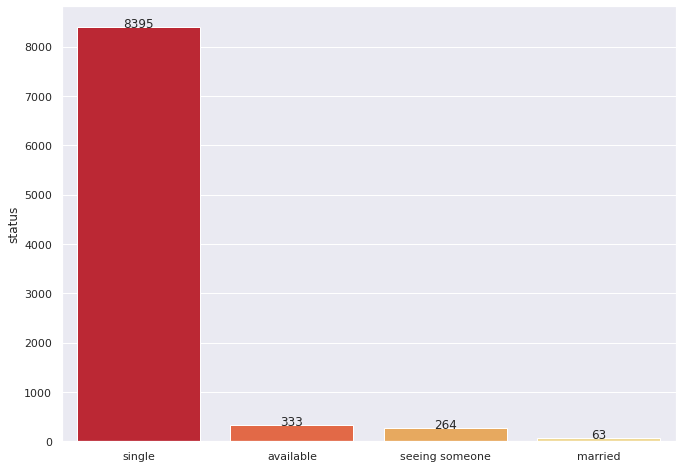

In [ ]:
find_replace_status = {"status" : {0: "single", 1: "available", 2: "seeing someone", 3: "married"}}
raw.replace(find_replace_status, inplace=True)
graph=sns.barplot(x=raw['status'].unique(),y=raw['status'].value_counts(),palette="YlOrRd_r")
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        int(height),ha="center")

**Age Distribution**

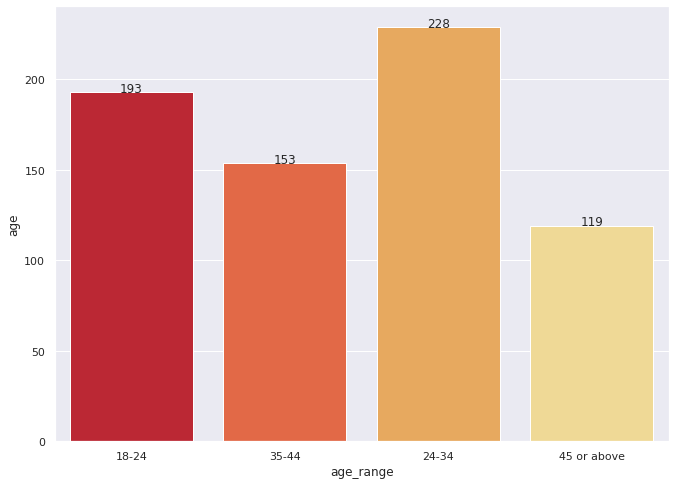

In [ ]:

a = []
for i in raw['age']:
  if i < 18:
    a.append("0-17")
  elif (i >= 18) & (i < 25):
    a.append("18-24")
  elif (i >= 25) & (i < 35):
    a.append("24-34")
  elif (i >= 35) & (i < 45):
    a.append("35-44")
  else:
    a.append("45 or above")

raw['age_range'] = a

gr=sns.barplot(x=raw['age_range'],y=raw['age'].value_counts(),palette="YlOrRd_r",ci=None)
for p in gr.patches:
    height = p.get_height()
    gr.text(p.get_x()+p.get_width()/2., height + 0.1,
        int(height),ha="center")


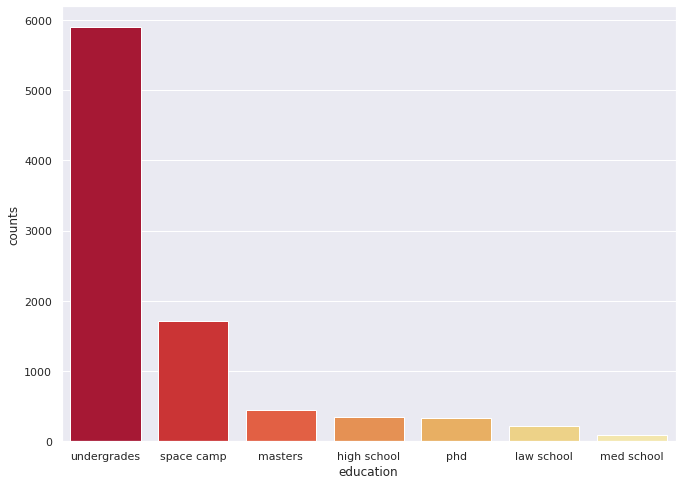

In [ ]:
find_replace_edu = {"education" : {0:"high school", 1:"undergrades", 2:"masters", 3:"phd", 
                                   4:"law school", 5:"med school", 6:"space camp"}}
raw.replace(find_replace_edu, inplace=True)

edu_dis = sns.barplot(x = raw['education'].unique(), y = raw['education'].value_counts(), palette="YlOrRd_r")
plt.xlabel('education')
plt.ylabel('counts');
sns.set(font_scale=1)

# 3. Clustering

In [ ]:
import sys
sys.setrecursionlimit(10000)

In [ ]:
# Usual
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# for distance and h-clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_samples, silhouette_score

# sklearn does have some functionality too, but mostly a wrapper to scipy
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

# for pca
from sklearn.decomposition import PCA

! pip install scikit-plot
import scikitplot as skplt

In [ ]:
ok_num = pd.read_csv('https://raw.githubusercontent.com/CarolineGuothesweetie/OkCupid/main/numecial.csv')

In [ ]:
ok_num.sample(5)

,id,age,status,sex,orientation,body_type,diet,drinks,drugs,education,height,income,offspring,pets,smokes
6657,43965,34,0,0,0,4,0,1,0,1,71.0,100000,2,0,0
6726,44353,42,0,1,0,2,0,2,1,1,67.0,20000,0,0,0
5107,33416,26,0,1,0,1,1,2,0,1,64.0,0,1,0,0
7093,47096,54,0,1,0,1,0,2,0,1,65.0,50000,3,0,0
3786,25144,20,0,0,0,0,0,2,1,1,68.0,50000,0,0,0


In [ ]:
ok_num.dtypes

id               int64
age              int64
status           int64
sex              int64
orientation      int64
body_type        int64
diet             int64
drinks           int64
drugs            int64
education        int64
height         float64
income           int64
offspring        int64
pets             int64
smokes           int64
dtype: object

In [ ]:
scaler = StandardScaler()
scaler.fit(ok_num)
ok_scaled = scaler.transform(ok_num) 

## 3.1 PCA

Do the PCA in the first place and we decrease our components(creating new variables) to 8.

In [ ]:
pca = PCA()
pcs = pca.fit_transform(ok_scaled)
type(pcs)
pcs.shape

(9055, 15)

In [ ]:
# variance explation ratio -- pc explained variance
varexp = pca.explained_variance_ratio_
type(varexp)
varexp.shape
np.sum(varexp)

0.9999999999999999

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


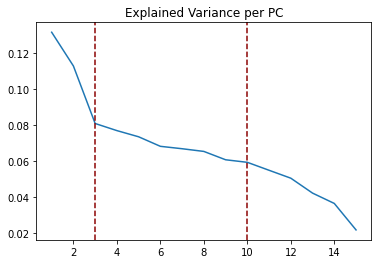

In [ ]:
# plot the variance explained the PC
plt.title("Explained Variance per PC")
sns.lineplot(range(1, len(varexp)+1), varexp)
plt.axvline(3,linestyle='--',color='darkred')
plt.axvline(10,linestyle='--',color='darkred')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


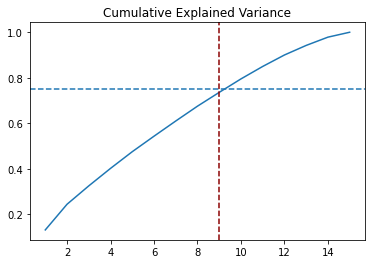

In [ ]:
# cumulative running percentange
plt.title("Cumulative Explained Variance")
sns.lineplot(range(1, len(varexp)+1), np.cumsum(varexp))
plt.axhline(.75, linestyle = "--")
plt.axvline(9,linestyle='--',color='darkred')
plt.show()

In [ ]:
comps = pca.components_
COLS = ["PC" + str(i) for i in range(1, len(varexp)+1)]
pca_df = pd.DataFrame(pcs[:,:9],columns=COLS[:9],index=ok_num.index)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1.997944,-0.760037,-0.849936,-0.547503,-1.014348,0.418199,0.584248,-1.666044,-0.077592
1,1.280934,-0.523340,3.331869,0.494907,2.737236,0.792284,0.319149,-1.751804,-1.030034
2,-1.115864,0.887976,-0.868667,-0.400047,0.002556,-0.163269,1.083825,-1.487439,0.492390
3,-1.317986,1.483714,-0.813060,-0.499380,0.131719,0.044041,1.061241,-1.562751,1.163822
4,0.873643,-1.501400,-0.946514,0.308611,0.767448,-0.986663,1.082661,-1.114050,-0.428645
...,...,...,...,...,...,...,...,...,...
9050,2.842337,0.931529,-0.206465,-1.295802,-1.120503,1.127344,-1.400629,1.159194,0.319723
9051,-0.786742,1.300633,-0.844944,-0.631528,0.473222,-1.040723,-1.498439,0.702965,0.311794
9052,0.752885,1.723089,-0.486861,-0.844660,-0.028957,-0.663247,-1.515661,0.585814,0.270598
9053,2.327150,-0.309665,-0.157514,-1.045516,0.161532,-1.323700,-1.243351,0.811024,-0.799432


## 3.2 H-cluster

Then we use Heirarchical Clustering to group our data with new dataset(after doing PCA).

**1. Calculate the distance between each data by pdist function.**

In [ ]:
fdist = pdist(pca_df.values)
fdist

array([5.86031876, 3.79636611, 4.38933339, ..., 2.91573808, 4.06286233,
       2.59906665])

**2. Try every linkage method to optimize our best h-cluster model. Finally we got "ward" since the result is more balanced and it is faster than other methods.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if __name__ == '__main__':


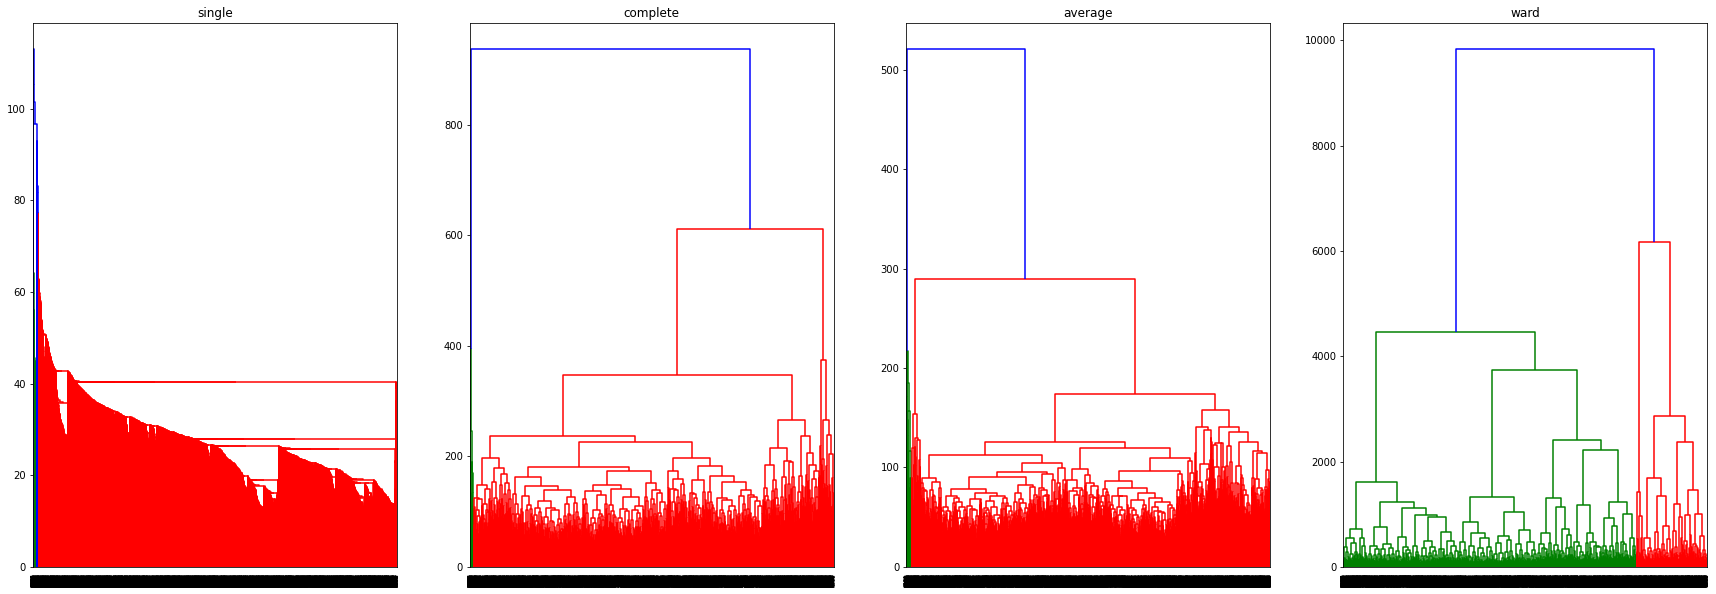

In [ ]:
# lets build our first cluster solution
# by default it's single linkage(shortest one)


METHOD = ['single', "complete", "average", "ward"]
for i, m in enumerate(METHOD):
  plt.subplot(1,4, i+1)
  plt.title(m)
  dendrogram(linkage(squareform(fdist), method = m), leaf_rotation = 90)
plt.gcf().set_size_inches(30, 10)
plt.show()

In [ ]:
# use ward as our linkage method
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)

hc1 = linkage(squareform(fdist), method = "ward")

In [ ]:
# what do we have
type(hc1)
hc1.shape

(9054, 4)

In [ ]:
hc1

array([[1.69000000e+03, 1.69100000e+03, 1.91447185e-03, 2.00000000e+00],
       [5.10100000e+03, 5.10600000e+03, 9.93798387e-03, 2.00000000e+00],
       [5.35200000e+03, 5.39000000e+03, 4.67795287e-01, 2.00000000e+00],
       ...,
       [1.80990000e+04, 1.81050000e+04, 4.45634925e+03, 7.30000000e+03],
       [1.80970000e+04, 1.81040000e+04, 6.16423752e+03, 1.75500000e+03],
       [1.81060000e+04, 1.81070000e+04, 9.83413977e+03, 9.05500000e+03]])

**3. We plot the dendrogram to choose the best numbers of our h-cluster model.**


*   The yellow line represents the senerio where we have five groups
*   The green line represents the senerio where we have eight groups



> Base on our goal(group users with different persona to build a recommender system for users), we believe 5 to 8 clusters is most appropriate for users.



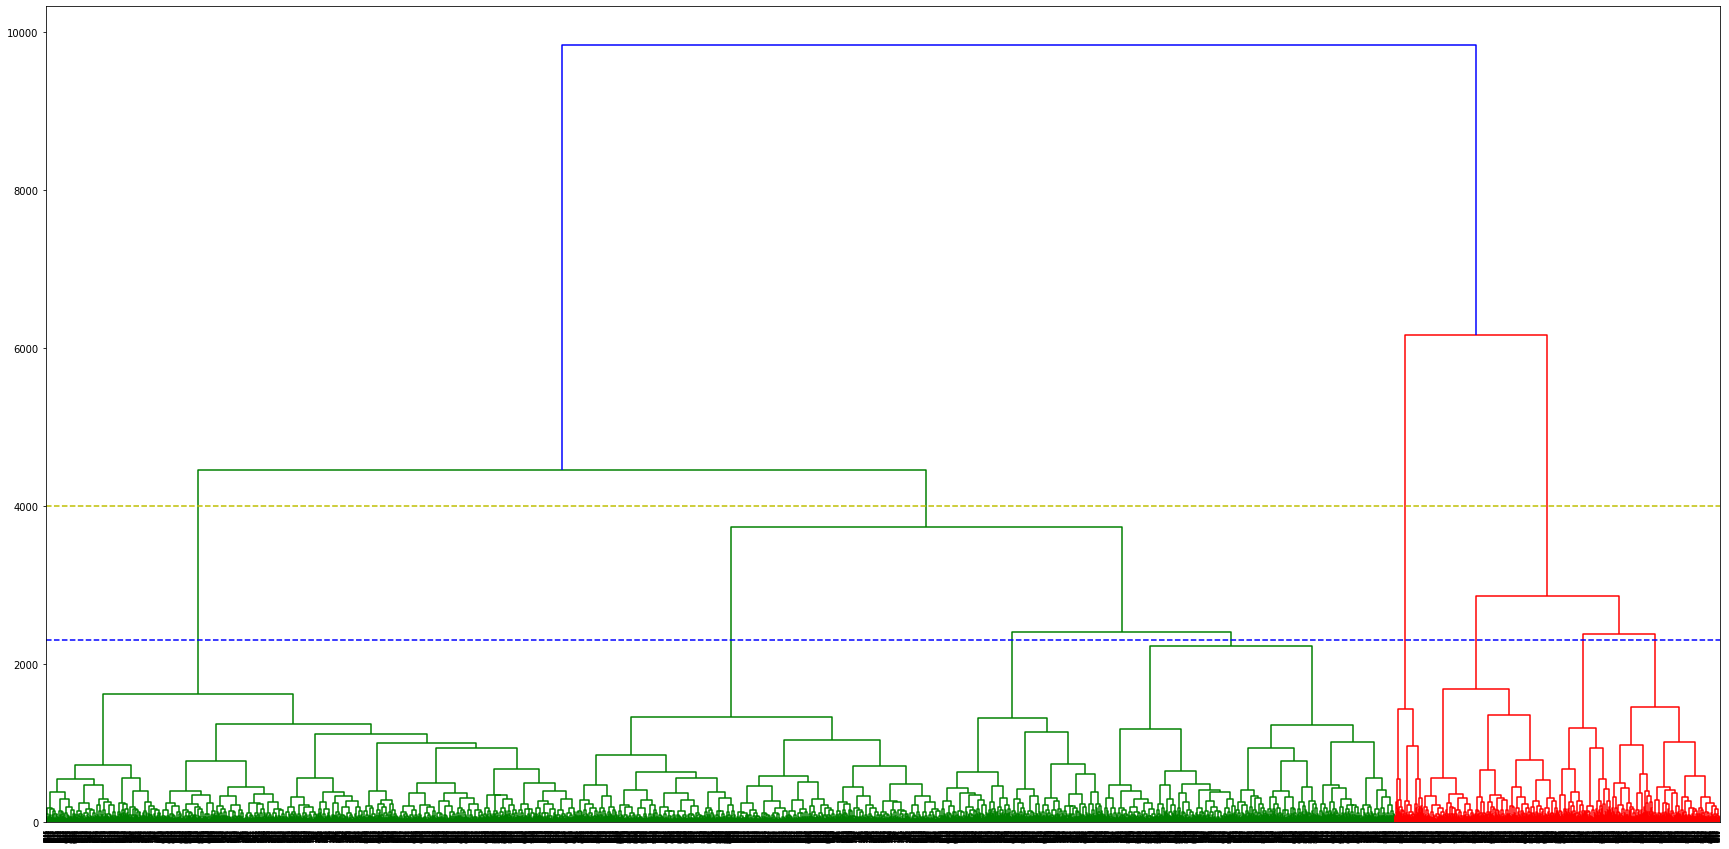

In [ ]:
# dendrogram
dendrogram(hc1)
plt.axhline(y = 4000, color = 'y', linestyle = "--")
plt.axhline(y = 2300, color = 'b', linestyle = "--")
plt.gcf().set_size_inches(30, 15)
plt.show()

In [ ]:
Df = pca_df.copy()

**4. Identify the number of clusters and see the distribution of each cluster.**


*   5 Clusters: we could see the distribution is quite even except for the cluster 4. But we know it is reasonable that we have some outliers when we are running clustering model.
*   8 Clusters: we could see the distribution is uneven and imbalanced.



In [ ]:
# fcluster - identify the number of clusters
c1 = fcluster(hc1, 4, criterion="maxclust")
Df['hcluster1'] = c1
Df.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,hcluster1
0,1.997944,-0.760037,-0.849936,-0.547503,-1.014348,0.418199,0.584248,-1.666044,-0.077592,1
1,1.280934,-0.523340,3.331869,0.494907,2.737236,0.792284,0.319149,-1.751804,-1.030034,4
2,-1.115864,0.887976,-0.868667,-0.400047,0.002556,-0.163269,1.083825,-1.487439,0.492390,2


In [ ]:
Df.hcluster1.value_counts()

2    4430
1    2870
4    1606
3     149
Name: hcluster1, dtype: int64

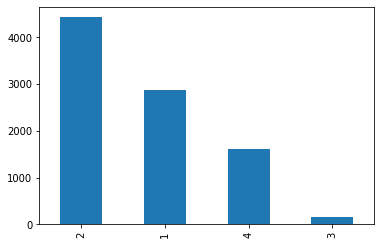

In [ ]:
Df.hcluster1.value_counts().plot(kind = "bar")

In [ ]:
# number of clusters we want
c2 = fcluster(hc1, 8, criterion="maxclust")
Df["hcluster"] = c2
Df.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,hcluster1,hcluster
0,1.997944,-0.760037,-0.849936,-0.547503,-1.014348,0.418199,0.584248,-1.666044,-0.077592,1,1
1,1.280934,-0.523340,3.331869,0.494907,2.737236,0.792284,0.319149,-1.751804,-1.030034,4,8
2,-1.115864,0.887976,-0.868667,-0.400047,0.002556,-0.163269,1.083825,-1.487439,0.492390,2,2


In [ ]:
Df.hcluster.value_counts()

1    2870
2    1975
4    1576
3     879
6     731
8     587
7     288
5     149
Name: hcluster, dtype: int64

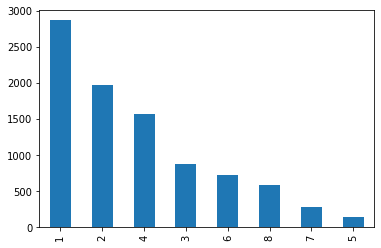

In [ ]:
Df.hcluster.value_counts().plot(kind = "bar")

5. Visualize the silhouette score to choose the optimal model.


*   5 Clusters

> Firstly, we have average score of 0.258 which is lower than 0.5. It is not ideal for clustering.

> Second, the distribution is uneven.

> Finally, the cluster 3 has lots of negative values.

*   8 Clusters

> Firstly, we have average score of 0.259 which is lower than 0.5. It is not ideal for clustering.

> Second, the distribution is uneven and imbalanced.

> Finally, the cluster 4, 6 and 8 have lots of negative values.

In [ ]:
silo_X = Df.values

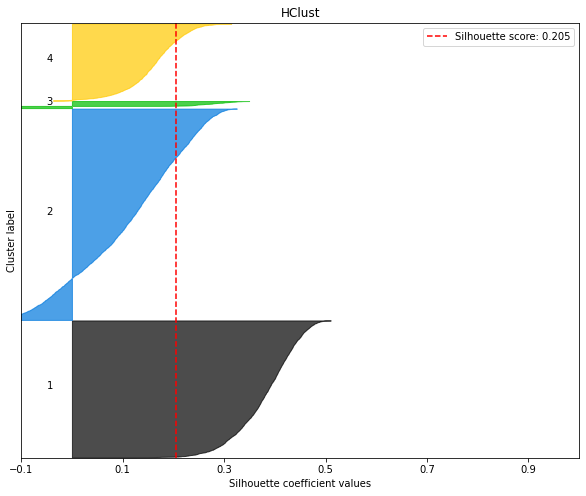

In [ ]:
# lets compare via silo
skplt.metrics.plot_silhouette(silo_X, c1, title="HClust", figsize=(10,8))
plt.show()

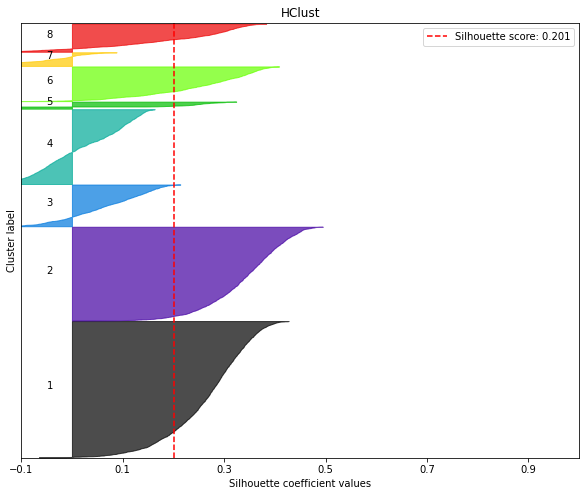

In [ ]:
# lets compare via silo
skplt.metrics.plot_silhouette(silo_X, c2, title="HClust", figsize=(10,8))
plt.show()

In [ ]:
ok_num['cluster'] = c2
ok_num.head()

,id,age,status,sex,orientation,body_type,diet,drinks,drugs,education,height,income,offspring,pets,smokes,cluster
0,0,22,0,0,0,2,0,2,0,1,75.0,0,1,0,3,1
1,1,35,0,0,0,1,4,3,1,6,70.0,80000,1,0,0,8
2,7,31,0,1,0,1,0,2,0,1,65.0,0,1,0,0,2
3,14,29,0,1,0,0,0,2,0,1,62.0,50000,1,0,0,2
4,19,33,0,0,0,4,0,2,0,2,72.0,0,0,0,0,1


In [ ]:
ok_num.to_csv('Df.csv', index=False)  

Based on our silhouette score, we know that it is relatively even and balance when we have 5 clusters, also there are few negative scores. Therefore, we believe the optimal number of heirarchical clustering is 5.

## 3.3 K-Means Cluster

In [ ]:
! pip install scikit-plot

In [ ]:
ok_num = pd.read_csv('https://raw.githubusercontent.com/CarolineGuothesweetie/OkCupid/main/numecial.csv')

In [ ]:
ok_num.sample(5)

,id,age,status,sex,orientation,body_type,diet,drinks,drugs,education,height,income,offspring,pets,smokes
5978,39537,40,0,0,0,4,1,1,0,1,75.0,40000,0,0,0
8963,59386,28,1,1,2,4,1,2,1,6,65.0,20000,0,0,3
6095,40218,59,0,0,0,4,1,2,0,1,72.0,100000,2,1,0
6806,44917,28,0,1,0,0,0,3,0,2,63.0,100000,1,0,0
4676,30499,33,0,1,0,0,0,1,0,1,60.0,0,0,0,0


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# what we need for today
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics 
#!pip install scikit-plot
from matplotlib import cm
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score


In [ ]:
import scikitplot as skplt

In [ ]:
ok_num.index = ok_num.id
del ok_num['id']

In [ ]:
ok_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9055 entries, 0 to 59944
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9055 non-null   int64  
 1   status       9055 non-null   int64  
 2   sex          9055 non-null   int64  
 3   orientation  9055 non-null   int64  
 4   body_type    9055 non-null   int64  
 5   diet         9055 non-null   int64  
 6   drinks       9055 non-null   int64  
 7   drugs        9055 non-null   int64  
 8   education    9055 non-null   int64  
 9   height       9055 non-null   float64
 10  income       9055 non-null   int64  
 11  offspring    9055 non-null   int64  
 12  pets         9055 non-null   int64  
 13  smokes       9055 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 1.0 MB


The standard deviation of each column are really different. Therefore, we need to scale it to the same unit.

In [ ]:
ok_num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9055.0,34.470237,11.422735,18.0,26.0,31.0,41.0,69.0
status,9055.0,0.115958,0.450099,0.0,0.0,0.0,0.0,3.0
sex,9055.0,0.458421,0.498296,0.0,0.0,0.0,1.0,1.0
orientation,9055.0,0.187852,0.518645,0.0,0.0,0.0,0.0,2.0
body_type,9055.0,2.296963,1.509870,0.0,1.0,2.0,4.0,5.0
diet,9055.0,0.318277,0.881587,0.0,0.0,0.0,0.0,4.0
drinks,9055.0,1.830701,0.795633,0.0,2.0,2.0,2.0,5.0
drugs,9055.0,0.214136,0.440870,0.0,0.0,0.0,0.0,2.0
education,9055.0,1.517725,1.200697,0.0,1.0,1.0,2.0,6.0
height,9055.0,68.063943,3.991818,43.0,65.0,68.0,71.0,95.0


In [ ]:
scaler = StandardScaler()
scaler.fit(ok_num)
ok_scaled = scaler.transform(ok_num) 

Before fitting and transform our data in model. PCA is used to reduce the dimensions of our data which only remains principle components.

In [ ]:
#Fit our PCA model
pca=PCA() 
pcs=pca.fit_transform(ok_scaled)

By looking at the plot of explaned variance ratio, pc from 4 to 7 is considered a decent number. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


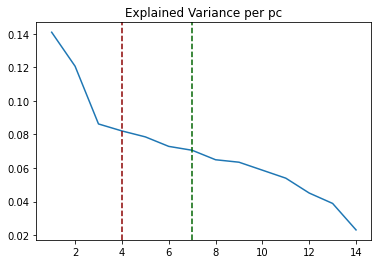

In [ ]:
#variance explanation ratio--pc explained varaince
varexp=pca.explained_variance_ratio_
plt.title("Explained Variance per pc")
sns.lineplot(range(1,len(varexp)+1),varexp)
plt.axvline(x=4,color='darkred', linestyle='--')
plt.axvline(x=7, color='darkgreen', linestyle='--')
plt.show()  

The accumulated variance explained by pc plot showing that 80% of the variance can be explained by 9 pc. Therefore, 9 is the number of the pc we retain.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


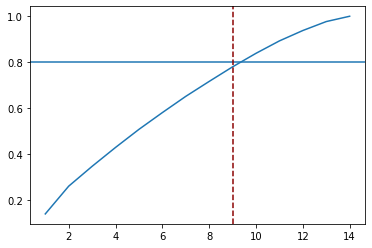

In [ ]:
sns.lineplot(range(1, len(varexp)+1),np.cumsum(varexp))
plt.axhline(.8)
plt.axvline(9,linestyle='--',color='darkred') 
plt.show()

However, there is no correlation between each principle component. Therefore,we try two methods
1. we keep all the variables.
2. we keep 9 pcs.
Compare two and pick the best one.




1. keep all the variables.

In [ ]:
comps=pca.components_
COLS=["PC"+ str(i) for i in range (1, len(comps)+1)]
COLS
X = pd.DataFrame(pcs[:,:],columns=COLS[:],index=ok_num.index)
X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
id,,,,,,,,,,,,,,
0,1.958581,-0.673831,-0.697495,-0.674083,-1.156697,0.212461,-0.886518,-0.039052,-0.481319,-0.155472,0.658797,1.752937,-0.244519,0.539130
1,1.244404,-0.443357,3.610190,-0.007197,2.544415,0.616331,-1.123851,-1.018253,-2.968309,1.859831,-1.404107,-0.475974,-0.920575,-0.626927
7,-1.151655,0.993728,-0.658561,-0.590943,-0.156431,-0.420585,-0.443605,0.538870,-0.063528,0.395683,-0.267473,0.090146,-0.297052,0.201618
14,-1.351943,1.591256,-0.597592,-0.706638,-0.037705,-0.217245,-0.504011,1.210497,-0.183109,0.430038,-0.288016,0.062243,-0.393743,-0.333516
19,0.830173,-1.405865,-0.727364,0.141330,0.662551,-1.201929,-0.188489,-0.388744,-0.025891,0.035984,-0.085462,0.104026,0.464689,0.108962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59907,2.885001,0.818801,-0.515337,-1.018505,-1.004805,1.387490,0.010253,0.262630,-1.126929,-0.136512,0.604486,-0.300962,0.246258,0.088549
59913,-0.744925,1.209143,-1.094379,-0.357160,0.636073,-0.748894,-0.479281,0.270965,0.236076,0.303988,-0.012299,-0.087396,0.392856,0.121206
59920,0.796725,1.624014,-0.748355,-0.584959,0.112788,-0.386426,-0.572505,0.227372,-0.253426,0.462124,-0.171966,-1.611128,-0.460201,0.819913


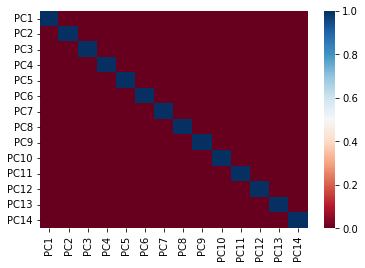

In [ ]:
pc_cor=X.corr()
sns.heatmap(pc_cor,cmap='RdBu')

We take the range from 2-30 clusters and see the optimal number of clsters based on the elbow method and the silhouette score.

In [ ]:
#K-means
KS = range(2, 30)
inertia = []
silo = []
X1 = X.values

for k in KS:
  km = KMeans(k)
  km.fit(X1)
  labs = km.predict(X1)
  inertia.append(km.inertia_)
  silo.append(silhouette_score(X1, labs))


**Elbow Method and Silohuette Score Plot**

The plot on the left shows that inertia for the number of clusters, and the optimal k is between 8 and 13, and the silohuette score plot shows that the peak of the plot is located at 9. Therefore, k of 9 is our decision for the k.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


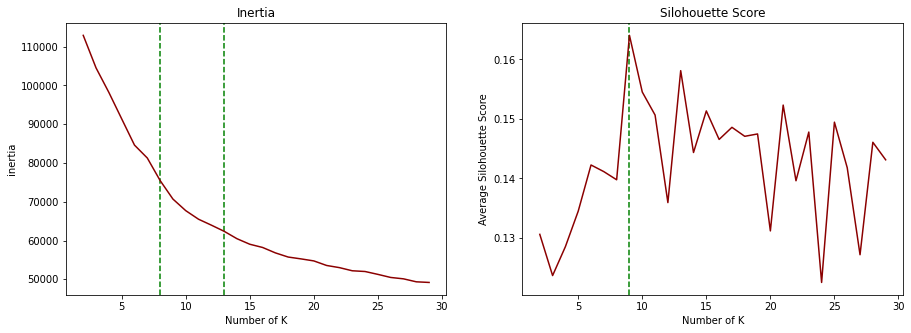

In [ ]:

plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.title("Inertia")
plt.axvline(8,linestyle="--",color="green")
plt.axvline(13, linestyle="--",color='green')
plt.xlabel("Number of K")
plt.ylabel("inertia")
sns.lineplot(KS, inertia,color="darkred")

plt.subplot(1, 2, 2)
plt.title("Silohouette Score")
plt.axvline(9,linestyle="--",color="green")
plt.xlabel("Number of K")
plt.ylabel("Average Silohouette Score")
sns.lineplot(KS, silo,color='darkred')

plt.show()

In [ ]:
k9A=KMeans(9) #initaite the project
k9A.fit(X) #fit the model
labs=k9A.predict(X) 

**Sihouette Plot**
1. The silhouette score plot shows that the distribution of each cluster is uneven.

2. There are negative values in some of the cluster which indicates misclustering. 

3. the average sihouette score is 0.160. 

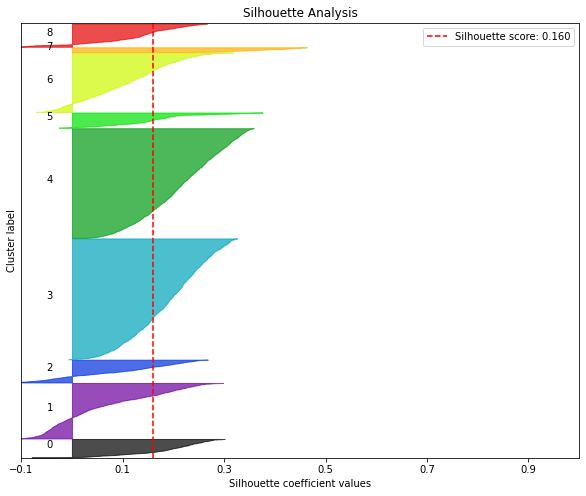

In [ ]:
silo_overall=metrics.silhouette_score(X,k11.predict(X))
silo_overall

silo_sample=metrics.silhouette_samples(X,k11.predict(X))
silo_sample

#plotting
skplt.metrics.plot_silhouette(X,k11.predict(X),figsize=(10,8))
plt.show()

Method 2: We keep 9 pcs

In [ ]:
comps=pca.components_
COLS=["PC"+ str(i) for i in range (1, len(comps)+1)]
COLS
XX = pd.DataFrame(pcs[:,:9],columns=COLS[:9],index=ok_num.index)
XX

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
id,,,,,,,,,
0,1.958581,-0.673831,-0.697495,-0.674083,-1.156697,0.212461,-0.886518,-0.039052,-0.481319
1,1.244404,-0.443357,3.610190,-0.007197,2.544415,0.616331,-1.123851,-1.018253,-2.968309
7,-1.151655,0.993728,-0.658561,-0.590943,-0.156431,-0.420585,-0.443605,0.538870,-0.063528
14,-1.351943,1.591256,-0.597592,-0.706638,-0.037705,-0.217245,-0.504011,1.210497,-0.183109
19,0.830173,-1.405865,-0.727364,0.141330,0.662551,-1.201929,-0.188489,-0.388744,-0.025891
...,...,...,...,...,...,...,...,...,...
59907,2.885001,0.818801,-0.515337,-1.018505,-1.004805,1.387490,0.010253,0.262630,-1.126929
59913,-0.744925,1.209143,-1.094379,-0.357160,0.636073,-0.748894,-0.479281,0.270965,0.236076
59920,0.796725,1.624014,-0.748355,-0.584959,0.112788,-0.386426,-0.572505,0.227372,-0.253426


In [ ]:
#K-means
KS = range(2, 30)
inertia = []
silo = []
XX1 = XX.values

for k in KS:
  km = KMeans(k)
  km.fit(XX1)
  labs = km.predict(XX1)
  inertia.append(km.inertia_)
  silo.append(silhouette_score(XX1, labs))

**Elbow Method and Silohuette Score Plot**

The plot on the left shows that inertia for the number of clusters, and the optimal k is between 6 and 10, and the silohuette score plot shows that the peak of the plot is located at 8. Therefore, k of 8 is our decision for the k.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


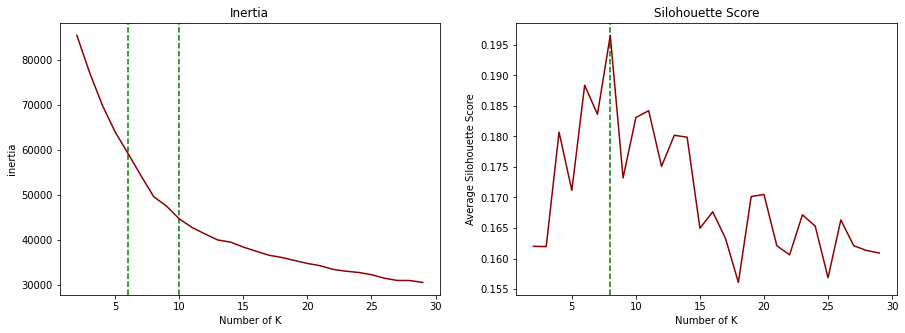

In [ ]:
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.title("Inertia")
plt.axvline(8,linestyle="--",color="green")
plt.axvline(10, linestyle="--",color='green')
plt.xlabel("Number of K")
plt.ylabel("inertia")
sns.lineplot(KS, inertia,color="darkred")

plt.subplot(1, 2, 2)
plt.title("Silohouette Score")
plt.axvline(8,linestyle="--",color="green")
plt.xlabel("Number of K")
plt.ylabel("Average Silohouette Score")
sns.lineplot(KS, silo,color='darkred')

plt.show()

In [ ]:
k8=KMeans(8) #initaite the project
k8.fit(XX) #fit the model
labs=k8.predict(XX) 

In [ ]:
labs

array([5, 1, 2, ..., 2, 5, 5], dtype=int32)

**Sihouette Plot**
1. The silhouette score plot shows that the distribution of each cluster is uneven.

2. There are negative values in some of the cluster which indicates misclustering. 

3. the average sihouette score is 0.196. 

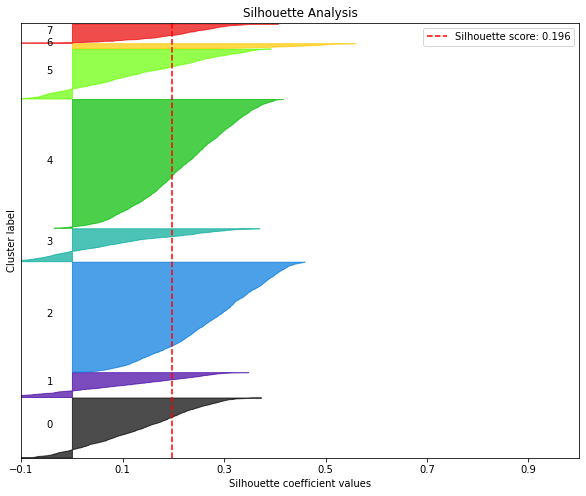

In [ ]:
silo_overall=metrics.silhouette_score(XX,k8.predict(XX))
silo_overall

silo_sample=metrics.silhouette_samples(XX,k8.predict(XX))
silo_sample

#plotting
skplt.metrics.plot_silhouette(XX,k8.predict(XX),figsize=(10,8))
plt.show()

Comparing the Sihouette average score between pcs of 14 and pcs of 8 has the a higher score. Therefore, we choose 9 pcs with 8 clusters for k-means

In [ ]:
ok_num['k8'] = labs

In [ ]:
ok_num

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,height,income,offspring,pets,smokes,k8
id,,,,,,,,,,,,,,,
0,22,0,0,0,2,0,2,0,1,75.0,0,1,0,3,5
1,35,0,0,0,1,4,3,1,6,70.0,80000,1,0,0,1
7,31,0,1,0,1,0,2,0,1,65.0,0,1,0,0,2
14,29,0,1,0,0,0,2,0,1,62.0,50000,1,0,0,2
19,33,0,0,0,4,0,2,0,2,72.0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59907,24,0,0,0,0,0,2,1,1,72.0,20000,0,1,3,5
59913,29,0,1,0,2,0,2,0,1,64.0,0,0,0,0,2
59920,22,0,1,0,1,0,2,1,1,68.0,0,0,0,0,2


In [ ]:
k8=KMeans(4) #initaite the project
k8.fit(XX) #fit the model
labs=k8.predict(XX) 

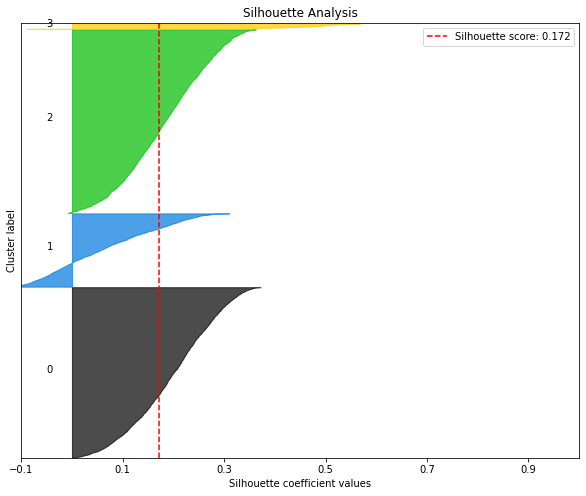

In [ ]:
silo_overall=metrics.silhouette_score(XX,k8.predict(XX))
silo_overall

silo_sample=metrics.silhouette_samples(XX,k8.predict(XX))
silo_sample

#plotting
skplt.metrics.plot_silhouette(XX,k8.predict(XX),figsize=(10,8))
plt.show()

# 4. Text Analysis

In [ ]:
! pip install newspaper3k
! pip install -U spacy
! pip install nltk
! pip install scikit-plot
! pip install umap-learn

     |████████████████████████████████| 211 kB 4.2 MB/s 
     |████████████████████████████████| 81 kB 8.8 MB/s 
     |████████████████████████████████| 87 kB 6.1 MB/s 
     |████████████████████████████████| 7.4 MB 23.0 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=9007b0930bfb2eb3d6688cf72edce25154e6411445cc8c45b3070db1f438150d
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3356 sha256=7bf404a0d69aca86b46f8168859d52bd227a94cebe99d87792ca31c0ecb21128
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398405 sha256=79f6079bce638659f9693d7616f77bdcfe8b5ce060ca327c48912217f987bfdf
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a597957432

In [ ]:
# plot 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

import spacy
from spacy import cli 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer  
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# compression
from sklearn.decomposition import PCA
from sklearn import metrics 
from umap import UMAP


from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
ok_text = pd.read_csv('https://raw.githubusercontent.com/CarolineGuothesweetie/OkCupid/main/text.csv')

In [ ]:
ok_text.sample(3)

,id,Full_essay,location
1913,12472,"i'm shy, and terrible at writing about myself....","san francisco, california"
4561,29829,"i am very honest, loving, person. things what ...","san francisco, california"
4720,30750,i am a 39 year old single woman in san francis...,"san francisco, california"


In [ ]:
ok_text.Full_essay

0       about me:  i would love to think that i was so...
1       i am a chef: this is what that means. 1. i am ...
2       writing. meeting new people, spending time wit...
3       i have an awesome career working as a senior m...
4       i relocated to san francisco half a year ago. ...
                              ...                        
9050    my name is peter. i'm an oakland native, and i...
9051    i have lived in sf off and on for 7.5 years no...
9052    i'd like your finest milksteak please. and not...
9053    i'm nick. i never know what to write about mys...
9054    "all i have in this world are my balls and my ...
Name: Full_essay, Length: 9055, dtype: object

## 4.1 Spacy (The method we use for the finial result) 

In [ ]:
import spacy
from spacy import cli
from spacy import displacy
model = "en_core_web_md"
cli.download(model)

nlp = spacy.load(model)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
nlp.pipe_names
EXCL = ['tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
docs = list(nlp.pipe(ok_text.Full_essay, disable=EXCL))

In [ ]:
dv = [doc.vector for doc in docs]
dv = np.array(dv)

In [ ]:
# get the dvs for the ok_test sample set
# ok_docs = list(nlp.pipe(ok_text_sample.Full_essay))

# ok_dv = [doc.vector for doc in ok_docs]
# ok_dv = np.array(ok_dv)

# ok_dv.shape

## 4.2 PCA

In [ ]:
pca = PCA(0.9)
pcs = pca.fit_transform(dv)
pca.explained_variance_ratio_.sum()

0.90202063

In [ ]:
from sklearn.manifold import TSNE
# Tsne 
tsne = TSNE()

tsne.fit(pcs)

# get the embeddings
te = tsne.embedding_


# the shape
te.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1000, 2)

In [ ]:
# 2d tsne
tdata = pd.DataFrame(te, columns=['e1', 'e2'])
tdata['y'] = ok_text['id']

tdata.head(3)

,e1,e2,y
0,3.806614,25.156027,0
1,8.452434,31.312216,1
2,4.077350,12.688449,7


In [ ]:
# the plot
PAL = sns.color_palette("bright", 10) 
plt.figure(figsize=(6, 4))
sns.scatterplot(x="e1", y="e2", hue="y", data=tdata, legend="full")

## 4.3 UMAP 

In [ ]:
# first, apply umap
reducer = UMAP(random_state=82)

# embeddind 
embeds = reducer.fit_transform(pcs)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
embeds.shape

(9055, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


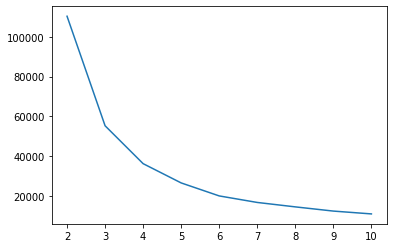

In [ ]:
# using elbow method to determine number of K 
from sklearn.cluster import KMeans, DBSCAN
krange = range(2, 11)
ss = []
for k in krange:
    km = KMeans(k)
    labs = km.fit_predict(embeds)
    ss.append(km.inertia_)
sns.lineplot(krange, ss)

For n_clusters = 2, silhouette score is 0.8020741939544678)
For n_clusters = 3, silhouette score is 0.4363890588283539)
For n_clusters = 4, silhouette score is 0.41764727234840393)
For n_clusters = 5, silhouette score is 0.4177722632884979)
For n_clusters = 6, silhouette score is 0.4164850115776062)
For n_clusters = 7, silhouette score is 0.39566633105278015)
For n_clusters = 8, silhouette score is 0.3822871744632721)
For n_clusters = 9, silhouette score is 0.3971508741378784)
For n_clusters = 10, silhouette score is 0.3892044723033905)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Average Silhouette score'),
 Text(0.5, 0, 'Number of cluster'),
 Text(0.5, 1.0, ' Silhouette method')]

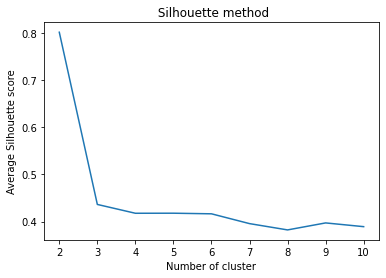

In [ ]:
# silhouette score
crange = range(2, 11)
ss1 = []
for n_clusters in range(2,11):
    clusterer = KMeans(n_clusters=n_clusters, random_state=820)
    preds = clusterer.fit_predict(embeds)
    centers = clusterer.cluster_centers_
    score = metrics.silhouette_score(embeds, preds)
    ss1.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
sns.lineplot(crange, ss1).set(title = ' Silhouette method', xlabel = 'Number of cluster', ylabel ='Average Silhouette score')


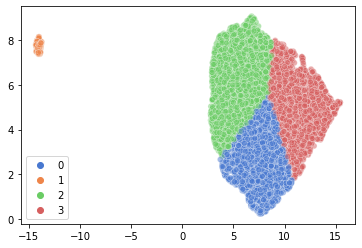

In [ ]:
km = KMeans(4)
km.fit(embeds)

preds = km.predict(embeds)

# lets plot this
sns.scatterplot(x=embeds[:, 0], y=embeds[:, 1], hue=preds, alpha=.5, palette="muted")

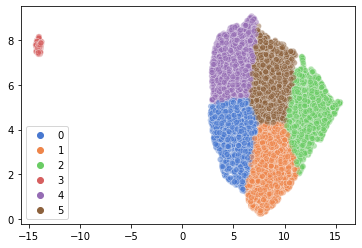

In [ ]:
km = KMeans(6)
km.fit(embeds)

preds = km.predict(embeds)

# lets plot this
sns.scatterplot(x=embeds[:, 0], y=embeds[:, 1], hue=preds, alpha=.5, palette="muted")

# 5. Conclusions and Recommendations

Based on our earlier findings, we are good to see that we have 
* 8 clusters for our numerical part (basic information of users)
* 6 clusters for our text part (text description about their preference)


The reason that we applied multiple analytical tools on it, is to find a way of promoting the mechanism behind dating apps, to make things easier and more precise for finding a potentially destined lover. After we have these two main clusterings, we will be able to have the result of a newbie user. This is how this procedure works:


* Input the required information into the system once a newbie user is in, the system will automatically assign him/her into the basic user pool according to our first clustering algorithm. In this pool, most people will be sharing similar interests, income, living habitats with him/her.

* Once the user has been placed on their ‘planet’, fill in other selective verbal descriptions at least one. That way our second sorting algorithm will be working on it and sort the user into the second pool as well. In that pool, people will be sharing similar preferences and similar characteristics with him/her.

* Generally speaking, we as an analytical team, manage to use the existing data to create clustering. And using that, we are able to use models to train and forecast.


Moreover, we still have some limitations. We currently have no means to deal with the users’ location. But due to our raw material, the main resource of our user is southern California, so we would like to put the precise location into users’ profile after being sorted into two precise pools. That way, people can think for themselves whether they care about it or not.
